In [165]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

# Definerer symboler
bta, E, alpha, T, w, L = sp.symbols('beta E alpha T w L')

# Utledning matematisk av minstelønn under fullkomment arbeidsmarked og under monopsoni

# Etterspørsel på arbeid
def L_D(E,alpha,w):
    return (E/alpha)-(1/alpha)*w

# Tilbud av arbeid
def L_S(T,bta,w):
    return -(T/bta)+(1/bta)*w


# Løser for etterspørsel og finner etterspørselskurven
etterspørsel = sp.solve(sp.Eq(L, L_D(E,alpha,w)), w)

# Definerer etterspørselskurven, bytter om på L og a men har lite betydning
def e_p(E,L,a):
    return E - a*L

# Løser for w og finner tilbudskurven
tilbud = sp.solve(sp.Eq(L_S(T,bta,w), L), w)

# Definerer tilbudskurven, bytter litt om på variablene slik at det blir enklere
def t_b(T,b,L):
    return T + b*L 

# betingelse for likevekt
eq_cond=sp.Eq(L_D(E,alpha,w),L_S(T,bta,w))

# Løser for w
p_eq=sp.solve(eq_cond,w)

# Definerer numeriske verdier for å plotte
E_num = 250
a = 0.5
x = np.arange(0,550,1)
b = 0.5
T_num = 10

# Løser likevekt for w
w_eq_num = float(p_eq[0].subs({E: E_num, alpha: a, T: T_num, bta: b}))
# Løser likevekt for L
L_eq_num = float(L_D(E_num, a, w_eq_num))

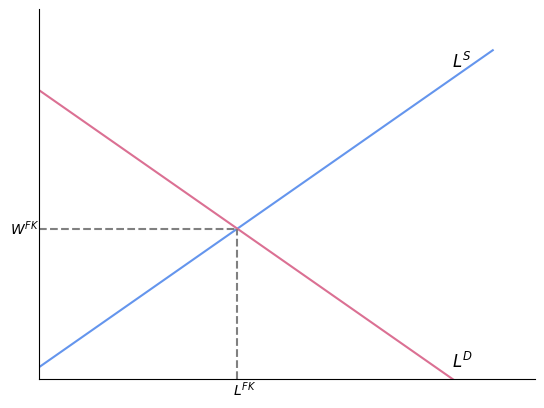

In [166]:
# Plotter likevekt uten minstelønn under fullkommen konkurranse
# Creating the axa for plotting
def create_ax():
    fig, ax = plt.subplots()
    ax.set(xlim=(0, 600))
    ax.set(ylim=(0, 320))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

# Starting fig
fig, ax = create_ax()
# Plotter tilbud
ax.plot(x, t_b(T_num,b,x), label='Tilbud', color="cornflowerblue")
# Plotter etterspørsel
ax.plot(x,e_p(E_num,a,x), label='Etterspørsel', color="palevioletred")
ax.set_xlim(0,600)
ax.set_ylim(0,320)
# Tegner en stiplet linje til likevekt
ax.vlines(L_eq_num, 0, w_eq_num, linestyles='dashed', color="grey")
ax.hlines(w_eq_num, 0, L_eq_num, linestyles='dashed', color="grey")
# Lager L^FK som skal være rett atmed L_eq_num
ax.annotate('$L^{FK}$', xy=(L_eq_num-5, -14), annotation_clip=False)
# Lager w^FK
ax.annotate('$W^{FK}$', xy=(-35, w_eq_num-5), annotation_clip=False)
# Lager L^S
ax.annotate('$L^S$', xy=(500, 270), size=12)
# Lager L^D
ax.annotate('$L^D$', xy=(500,10), size=12)
plt.show()

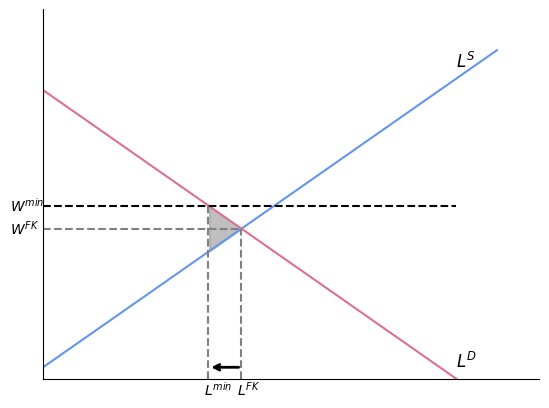

In [167]:
# løser for minstelønn på 150 for Labour
w_min = 150
L_eq_num_min = float(L_D(E_num, b,w_min))

# Starting fig
fig, ax = create_ax()

# Plotter tilbud
ax.plot(x, t_b(T_num,b,x), label='Tilbud', color="cornflowerblue")
# Plotter etterspørsel
ax.plot(x,e_p(E_num,a,x), label='Etterspørsel', color="palevioletred")

# Tegner en stiplet linje til likevekt
ax.vlines(L_eq_num, 0, w_eq_num, linestyles='dashed', color="grey")
ax.hlines(w_eq_num, 0, L_eq_num, linestyles='dashed', color="grey")

# Lager L^FK som skal være rett atmed L_eq_num
ax.annotate('$L^{FK}$', xy=(L_eq_num-5, -14), annotation_clip=False)
# Lager w^FK
ax.annotate('$W^{FK}$', xy=(-40, w_eq_num-5), annotation_clip=False)
# Lager L^S
ax.annotate('$L^S$', xy=(500, 270), size=12)
# Ikke se på denne kodelinjen
ax.fill_between(x, e_p(250, x, 0.5), t_b(10, x, 0.5), where=(x>L_eq_num_min) & (x<L_eq_num), color="grey", alpha=0.5)
# Lager L^D
ax.annotate('$L^D$', xy=(500,10), size=12)
# Legger til en minstelønn på 150
ax.hlines(w_min, 0, 500, linestyles='--', color="black")
# Lager W^min
ax.annotate('$W^{min}$', xy=(-40,145), annotation_clip=False)
# Lager en ny linje til likevekten for L^min
ax.vlines(L_eq_num_min, 0, w_min, linestyles='dashed', color="grey")
# Putter inn L^min
ax.annotate('$L^{min}$', xy=(L_eq_num_min-5,-14), annotation_clip=False)
# Lager en pil
ax.annotate("", (L_eq_num_min,10), (L_eq_num, 10), arrowprops={"arrowstyle":"->", "color":"black", "lw":2})
plt.show()